In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import shutil

In [2]:
# Crear la carpeta 'docs' en el nivel raíz
output_dir = os.path.join("docs")  
os.makedirs(output_dir, exist_ok=True)

In [3]:
#
# Carga de datos
#
def load_data():
    # Nueva ruta del archivo
    file_path = "files/input/shipping-data.csv"
    
    # Cargar el archivo CSV
    df = pd.read_csv(file_path)
    return df

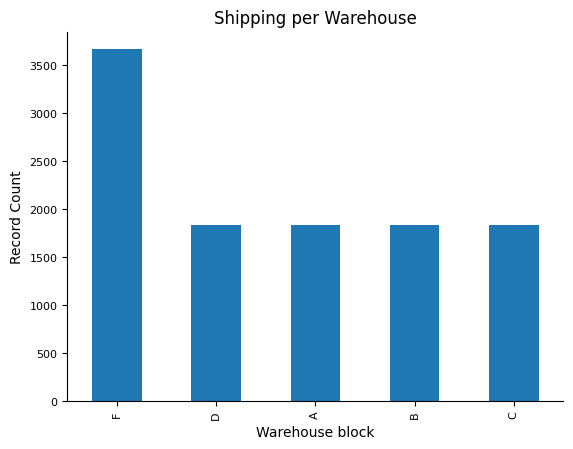

In [4]:
# Visualización del envío por almacén
def create_visual_for_shipping_per_warehouse(df):
    df = df.copy()  # Crear una copia del DataFrame
    plt.figure()  # Crear una nueva figura
    counts = df.Warehouse_block.value_counts()  # Contar valores únicos de Warehouse_block
    counts.plot.bar(
        title="Shipping per Warehouse",
        xlabel="Warehouse block",
        ylabel="Record Count",
        color="tab:blue",
        fontsize=8
    )
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.savefig("shipping_per_warehouse.png")

    plt.show()  # Mostrar el gráfico

# Llamada a la función con los datos cargados
df = load_data()
create_visual_for_shipping_per_warehouse(df)


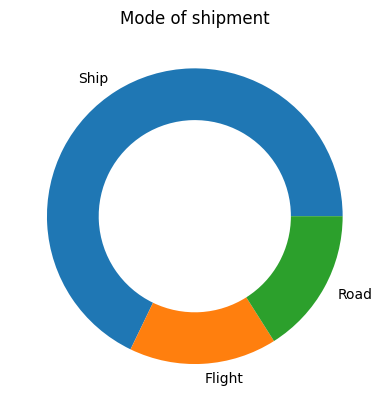

In [5]:
def create_visual_for_mode_of_shipment(df):
    df = df.copy()
    plt.figure()
    counts = df.Mode_of_Shipment.value_counts()
    counts.plot.pie(
        title="Mode of shipment",
        wedgeprops=dict(width=0.35),
        ylabel="",
        colors=["tab:blue", "tab:orange", "tab:green"],
    )
    plt.savefig("mode_of_shipment.png")

df = load_data()
create_visual_for_mode_of_shipment(df)


['tab:orange', 'tab:orange', 'tab:orange']

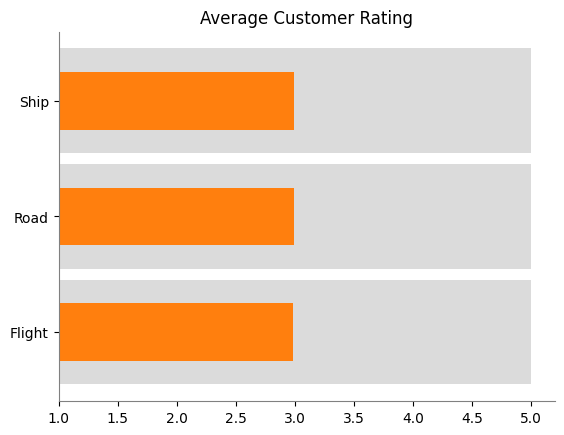

In [6]:
def create_visual_for_average_customer_rating(df):
    df = df.copy()
    plt.figure()
    df = (
        df[["Mode_of_Shipment", "Customer_rating"]]
        .groupby("Mode_of_Shipment")
        .describe()
    )
    df.columns = df.columns.droplevel()
    df = df[["mean", "min", "max"]]
    plt.barh(
        y=df.index.values,
        width=df["max"].values - 1,
        left=df["min"].values,
        height=0.9,
        color="lightgray",
        alpha=0.8,
    )
    colors = [
        "tab:green" if value >= 3.0 else "tab:orange" for value in df["mean"].values
    ]
    plt.barh(
    y=df.index.values,
    width=df["mean"].values - 1,
    left=df["min"].values,
    color=colors,
    height=0.5,
    alpha=1.0,
)
    plt.title("Average Customer Rating")
    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.savefig("average_customer_rating.png")

    return colors

df = load_data()
create_visual_for_average_customer_rating(df)


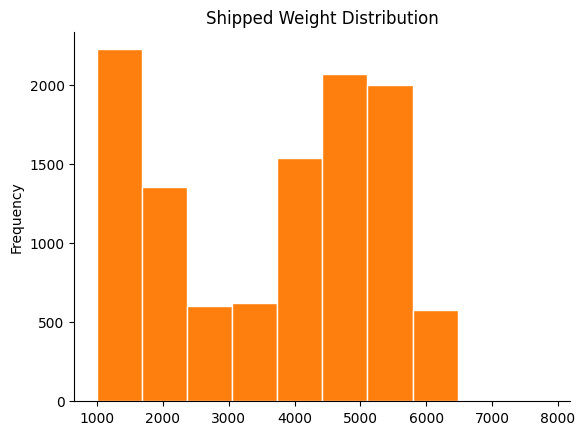

In [7]:
def create_visual_for_weight_distribution(df):
    df = df.copy()
    plt.figure()
    df.Weight_in_gms.plot.hist(
        title="Shipped Weight Distribution",
        color="tab:orange",
        edgecolor="white",
    )
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.savefig("weight_distribution.png")

df = load_data()
create_visual_for_weight_distribution(df)


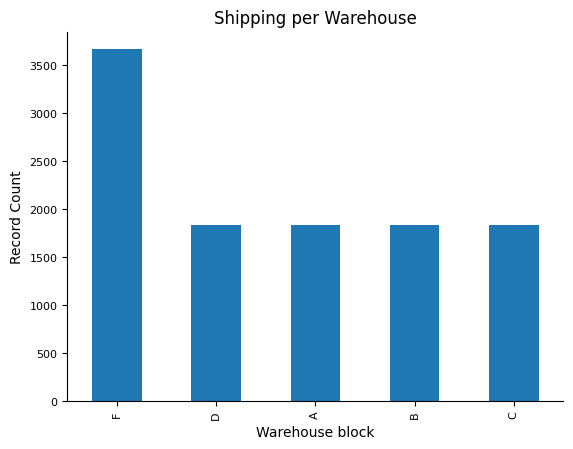

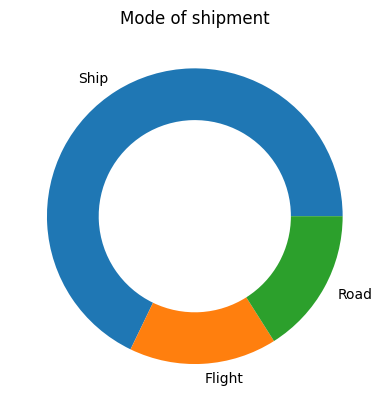

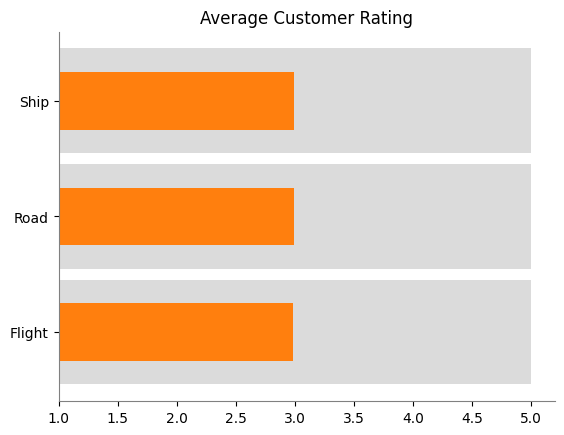

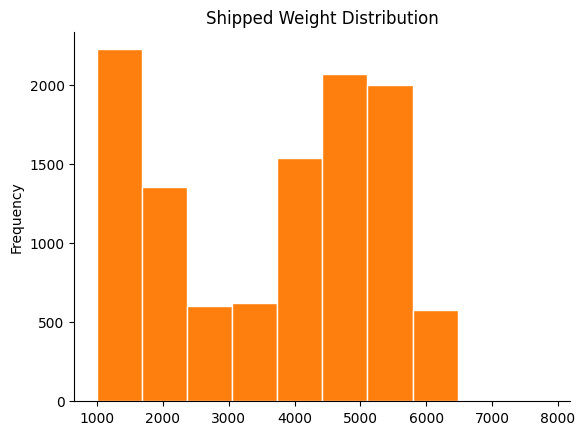

In [8]:
df = load_data()
create_visual_for_shipping_per_warehouse(df)
create_visual_for_mode_of_shipment(df)
create_visual_for_average_customer_rating(df)
create_visual_for_weight_distribution(df)


In [9]:
%%writefile index.html
<!DOCTYPE html>
<html>
    <body>
        <h1>Shipping Dashboard Example</h1>
        <div style="width:45%;float:left">
            <img src="shipping_per_warehouse.png" alt="Fig 1">
            <img src="mode_of_shipment.png" alt="Fig 2">
        </div>
        <div style="width:45%;float:left">
            <img src="average_customer_rating.png" alt="Fig 3">
            <img src="weight_distribution.png" alt="Fig 4">
        </div>
    </body>
</html>


Writing index.html


In [10]:
# Lista de archivos a mover
files_to_move = [
    "shipping_per_warehouse.png",
    "mode_of_shipment.png",
    "average_customer_rating.png",
    "weight_distribution.png",
    "index.html",
]

# Mover los archivos a la carpeta 'docs'
for file_name in files_to_move:
    if os.path.exists(file_name):  # Verifica que el archivo exista
        shutil.move(file_name, os.path.join(output_dir, file_name))  # Mueve el archivo

print(f"Todos los archivos se han movido a la carpeta '{output_dir}'.")

Todos los archivos se han movido a la carpeta 'docs'.
